In [1]:
import pandas as pd
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import math
from pprint import pprint

In [148]:
alfa = 0.000097
L = 1
#Relx = 0.5
deltaX = 0.05
deltat = 10
nodos = int(L/deltaX)
Bo = 15 # X = 0
Bl = 0 # X = L
##################################
a = -alfa*deltat/deltaX**2

In [149]:
initial = np.empty(nodos)
initial.fill(15)
initial = np.append(initial, 15)
source = np.zeros(len(initial))
zeros = np.zeros(len(initial))
Relax = np.zeros(len(initial))

In [150]:
x = np.linspace(start = 0, stop = L, num=nodos+1, endpoint=True)

In [151]:
M = np.zeros([len(x), len(x)])
for i in range(len(x)):
    for j in range(len(x)):
        if(i == j):
            if(i==0 or i == len(x)-1):
                M[i,j] = 1
            else:
                M[i,j] = (1-2*a)
        if (i != len(x)-1 and i - 1 == j):
            M[i,j] = a
            #print('2. position ' + str(i) + ',' + str(j) + ' has value ' + str(M[i,j]))
        if (i != 0 and i + 1 == j):
            M[i,j] = a
            #print('4. position ' + str(i) + ',' + str(j) + ' has value ' + str(M[i,j]))

In [167]:
M_inv = np.linalg.inv(M)
dfM_inv = pd.DataFrame(M_inv.round(2))
dfM = pd.DataFrame(M.round(2))
iterations = 20
result = [0]*iterations

In [168]:
for ite in range(iterations):
    if(ite == 0):
        newT = np.dot(M_inv, initial)
        result[0]=initial
    else:
        #print('ite: ' + str(ite))
        np.put(newT, len(newT)-1, 0)
        newT = np.dot(M_inv,newT)
        result[ite]= newT

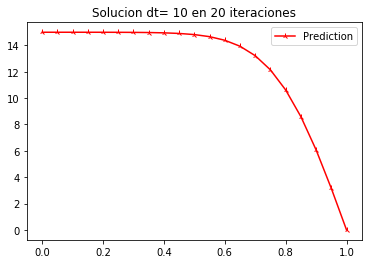

In [169]:
plt.plot(x, newT, marker = '2', color = 'red', label = 'Prediction')
plt.title('Solucion dt= ' + str(deltat) + ' en ' + str(iterations) + ' iteraciones')
plt.legend()
plt.show()

In [170]:
Data_result = pd.DataFrame(result).T
Data_result.columns = ['It '+ str(col+1) for col in Data_result.columns]
Data_result.index = Data_result.index*deltaX

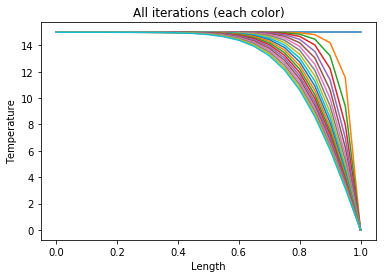

In [171]:
plt.plot(Data_result.iloc[:,:])
plt.title('All iterations (each color)')
plt.xlabel('Length')
plt.ylabel('Temperature')
plt.show()

In [172]:
Data_result.round(2)

,It 1,It 2,It 3,It 4,It 5,It 6,It 7,It 8,It 9,It 10,It 11,It 12,It 13,It 14,It 15,It 16,It 17,It 18,It 19,It 20
0.00,15.0,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
0.05,15.0,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
0.10,15.0,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
0.15,15.0,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
0.20,15.0,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
0.25,15.0,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
0.30,15.0,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,14.99,14.99,14.99
0.35,15.0,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,14.99,14.99,14.99,14.99,14.98,14.98
0.40,15.0,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,14.99,14.99,14.99,14.98,14.98,14.97,14.96,14.95
0.45,15.0,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,14.99,14.99,14.98,14.98,14.97,14.96,14.95,14.94,14.92,14.91
